## Use the right version of Tensorflow


In [0]:
%tensorflow_version 2.x

## Import the important statements

The following code imports the necessary code to run the code in the rest of this Colaboratory.

In [2]:
#@title Call the import statements

import numpy as np
import pandas as pd 
import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from os import path

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import  Dense, Activation, Dropout,Bidirectional, GlobalMaxPool1D,BatchNormalization, Embedding,LSTM, Flatten


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


## Load Stopwords, Stemmer, and Lemmatizer

In [4]:
sw = stopwords.words('english')
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer() 

swNot = ['no', 'nor', 'not', 'don', "don't", 'ain', 'aren', "aren't",
         'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't",
         'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn',
         "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
         "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
         "wasn't", 'weren', "weren't", "won't", 'wouldn',"wouldn't"]

for word in swNot:
   sw.remove(word)

print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', '

## Define the replace_puncts, strip_chars, and puncts

this list and arrays are going to be used in defining the functions

In [0]:
replace_puncts = {'`': "'", '′': "'", '“':'"', '”': '"', '‘': "'"}

strip_chars = [',', '.', '"', ':', ')', '(', '-', '|', ';', "'", '[', ']', '>', '=', '+', '\\', '•',  '~', '@', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

puncts = ['!', '?', '$', '&', '/', '%', '#', '*','£']

## Define functions that clean, lemmatize, process text, and remove stem words from text

The following code defines three functions:

  * `clean_text`, which convert word to lower case and replace some characters
  * `stem`, steam each word in the given text
  * `lemm`, which will lemmatize word
  * `stopwords1`, which remove the stopwords
  * `text_processing`, which incorporate all the function above into one function that will be used to process text later

In [0]:
def clean_text(x):
    x = str(x)
    x = x.lower()
    x = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", x)
    for k, v in replace_puncts.items():
        x = x.replace(k, f' {v} ')
        
    for punct in strip_chars:
        x = x.replace(punct, ' ') 
    
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
        
    x = x.replace(" '", " ")
    x = x.replace("' ", " ")
   
    return x

def stopwords1(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

def lemm(text):    
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text) 

def text_processing(X):
    X=X.apply(stopwords1)
    X=X.apply(clean_text)
    X=X.apply(stemming)
    X=X.apply(lemm)
    return X

## Loading Dataset

in this project, we use data from Kaggle :  [Fake and Real News Dasaset](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset) 


In [7]:
fake_dataset_url = 'https://raw.githubusercontent.com/Bangkit-2-Jakarta-Team/Fake-News-Detection/master/Datasets/Fake.csv'
true_dataset_url='https://raw.githubusercontent.com/Bangkit-2-Jakarta-Team/Fake-News-Detection/master/Datasets/True.csv'

df_fake = pd.read_csv(fake_dataset_url)
df_true = pd.read_csv(true_dataset_url)
df_fake['is_true'] = 0
df_true['is_true'] = 1

# make ratio of true and fake dataset is same
df_length = min(len(df_fake), len(df_true))
df_fake = df_fake[:df_length]
df_true = df_true[:df_length]

#Merge two dataframe into one
df_data = pd.concat([df_fake,df_true])

#Randomizing data sequence to scatter data
df_data = shuffle(df_data).reset_index(drop=True)

#Showing sample
df_data.sample(5)

,title,text,subject,date,is_true
23995,Iraqi PM orders security services 'to protect ...,BAGHDAD (Reuters) - Iraqi Prime Minister Haide...,worldnews,"September 25, 2017",1
32739,Treasury's Lew: China pause on reforms would h...,SEOUL (Reuters) - U.S. Treasury Secretary Jack...,politicsNews,"June 4, 2016",1
15164,House passes bill to aid children born into op...,WASHINGTON (Reuters) - The House of Representa...,politicsNews,"May 11, 2016",1
19478,WATCH: MAXINE WATERS Hits New Low…Trash Talks ...,"Yeah, well about that.Crazed Congresswoman Max...",politics,"Sep 20, 2017",0
36798,"Czech vote winner Babis wants active EU role, ...",PRAGUE (Reuters) - The Czech Republic must see...,worldnews,"October 21, 2017",1


## The Features Used

In [0]:
x = df_data['title']
y = df_data['is_true']

## Generating Wordcloud that show most common word in News Title

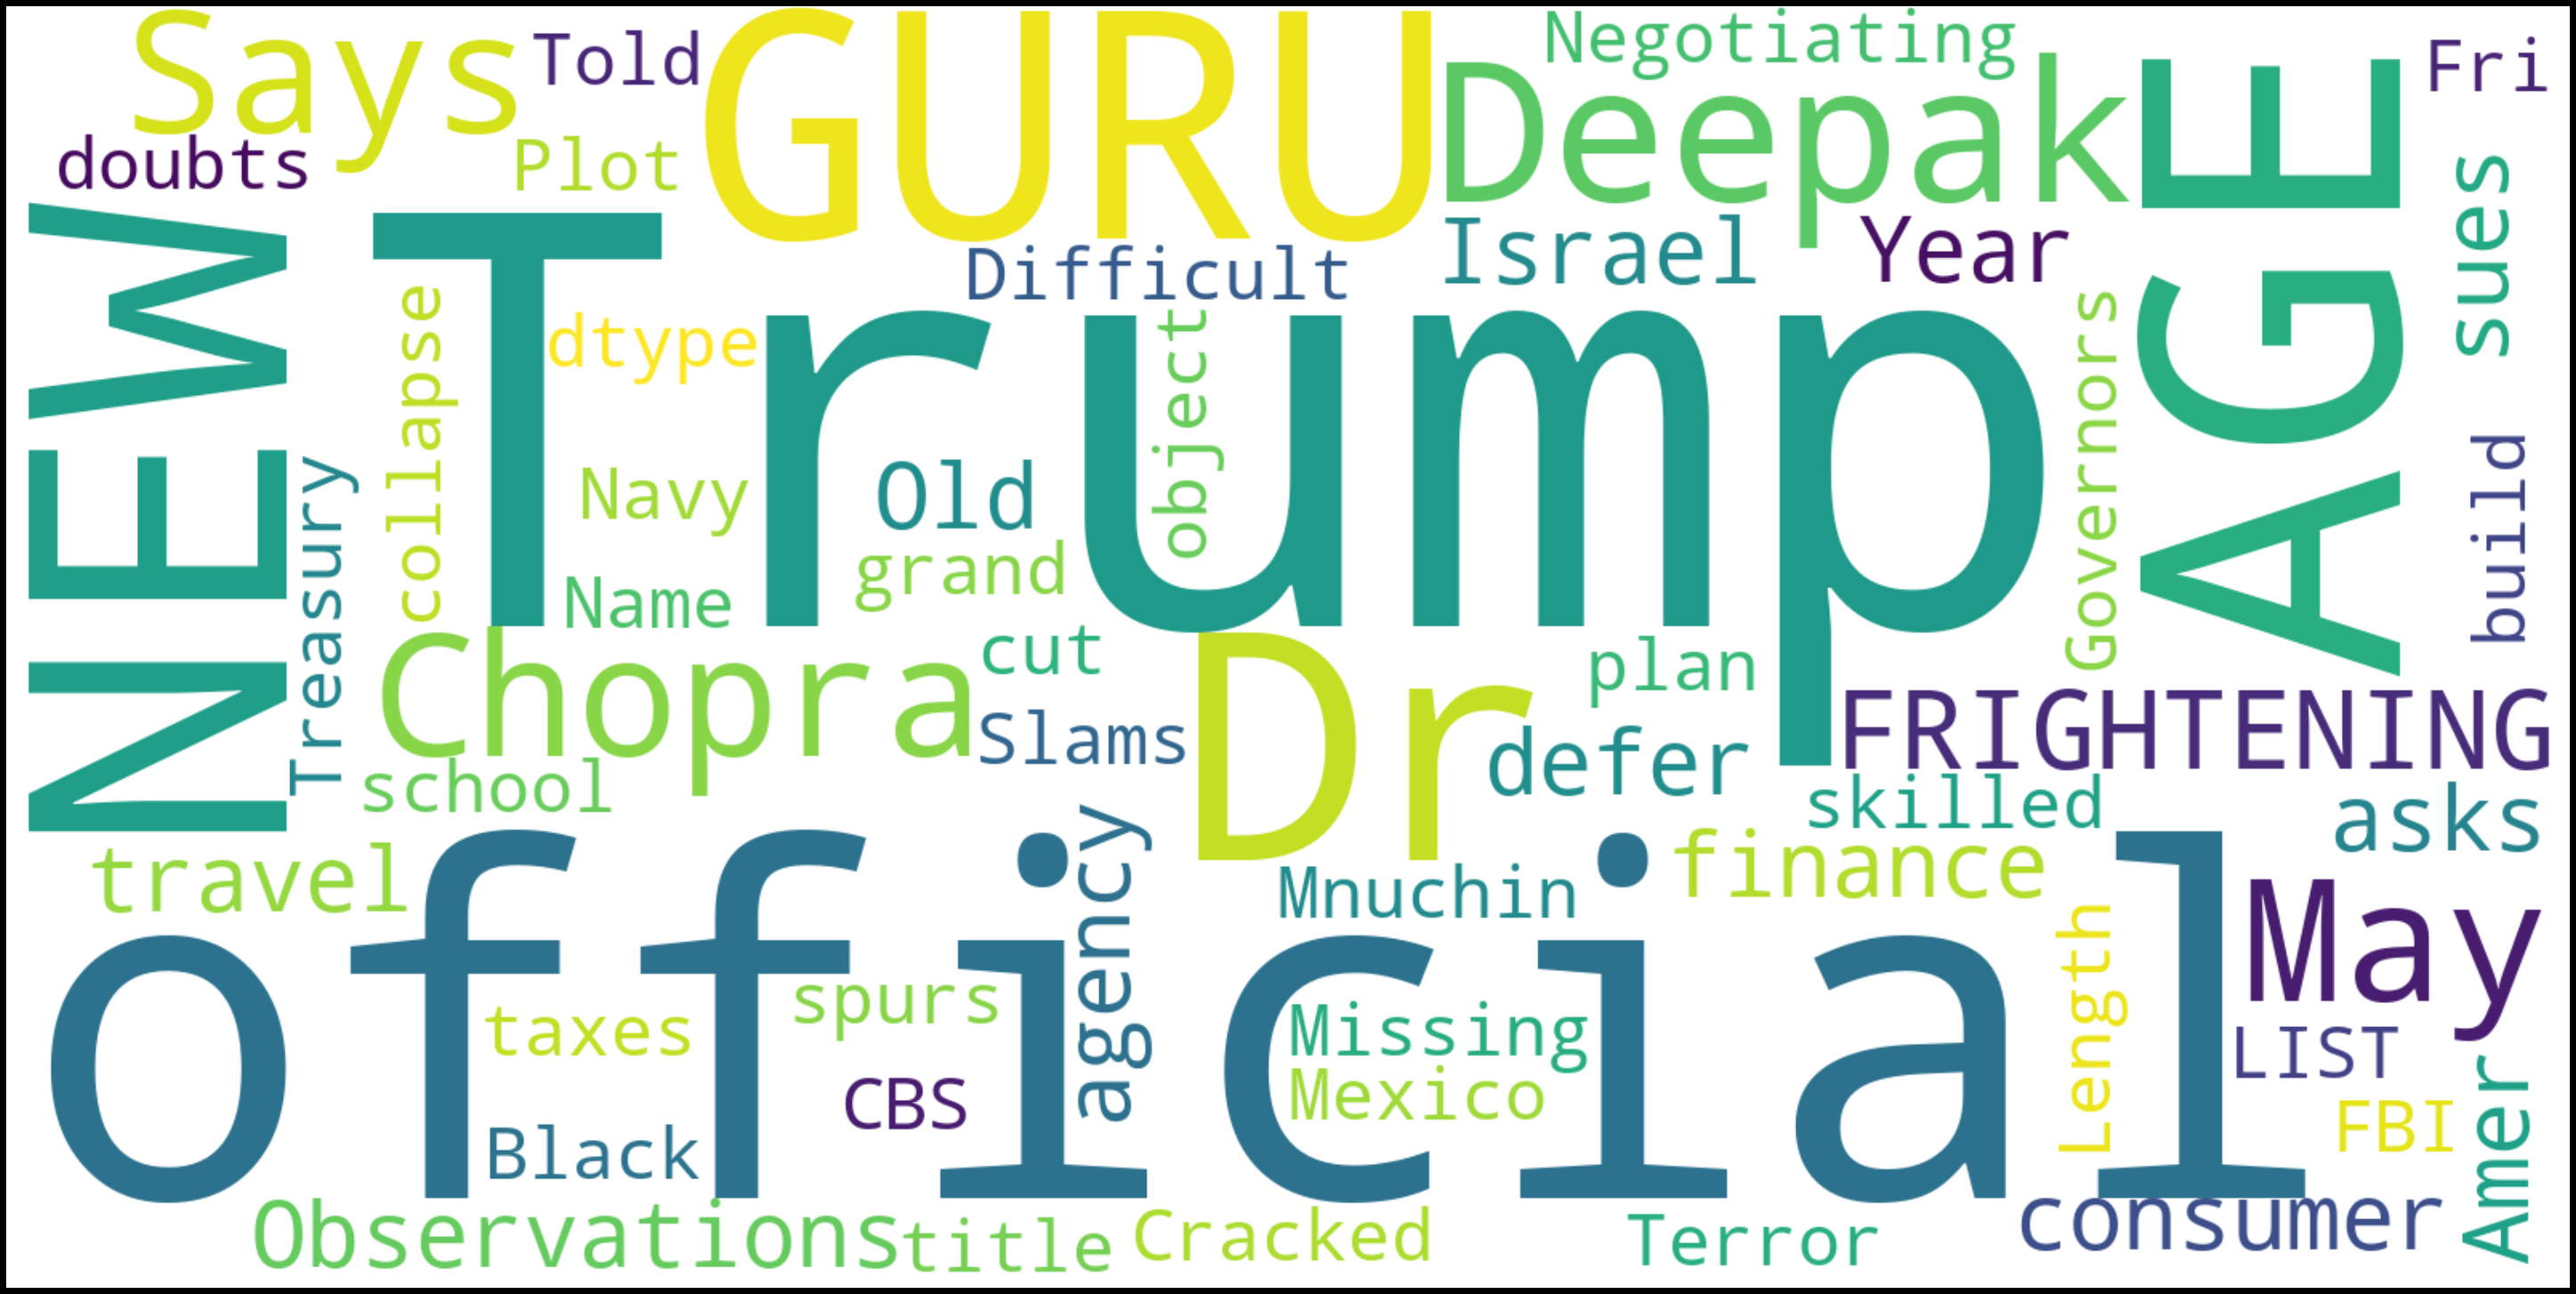

In [9]:
#Counting Unique word to generate WordCloud
text_wc = x
wordcloud= WordCloud(
    width =1600,
    height = 800,
    background_color='white',
    stopwords=STOPWORDS).generate(str(text_wc))
fig = plt.figure(
    figsize = (40,30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Clean title feature text

In [0]:
#Clean data using text_processing() function
clean_x = text_processing(x)

## Split train and test dataset

In [0]:
x_train, x_test, y_train, y_test = train_test_split(clean_x, y, test_size=0.3, random_state = 42)

## Tokenizer title text and label encoder

In [0]:
# Techniques Data
y_test_temp = y_test
max_words = 2000

# cast text to token
tokenize = text.Tokenizer(num_words=max_words)
tokenize.fit_on_texts(x_train) # only fit on train
x_train = tokenize.texts_to_sequences(x_train)
x_test = tokenize.texts_to_sequences(x_test)

# encode label
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

max_sequences= 300
x_train=pad_sequences(x_train,maxlen=max_sequences)
x_test=pad_sequences(x_test,maxlen=max_sequences)

## Neural Network Architecture

In [13]:
#LSTM DTS
embed_size = 128

model = Sequential()
model.add(Embedding(max_words,embed_size,input_length=max_sequences))
model.add(Bidirectional((LSTM(64,return_sequences = True,recurrent_dropout=0.5))))
model.add(Dropout(0.6))
model.add(GlobalMaxPool1D())
model.add(Dense(48, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(len(y.unique()), activation="softmax"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 128)          256000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300, 128)          98816     
_________________________________________________________________
dropout (Dropout)            (None, 300, 128)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 48)                6192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 9

## Train Model

In [14]:
batch_size = 64
epochs = 10

callbacks = [EarlyStopping(monitor='val_loss', patience=4, verbose=1),]
    
history3 =model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 402s 1s/step - loss: 0.2142 - accuracy: 0.9105 - val_loss: 0.2075 - val_accuracy: 0.9430
Epoch 2/10
375/375 [==============================] - 397s 1s/step - loss: 0.1096 - accuracy: 0.9576 - val_loss: 0.1734 - val_accuracy: 0.9428
Epoch 3/10
375/375 [==============================] - 398s 1s/step - loss: 0.0837 - accuracy: 0.9669 - val_loss: 0.1572 - val_accuracy: 0.9441
Epoch 4/10
375/375 [==============================] - 399s 1s/step - loss: 0.0648 - accuracy: 0.9752 - val_loss: 0.1668 - val_accuracy: 0.9363
Epoch 5/10
375/375 [==============================] - 396s 1s/step - loss: 0.0541 - accuracy: 0.9782 - val_loss: 0.1594 - val_accuracy: 0.9398
Epoch 6/10
375/375 [==============================] - 399s 1s/step - loss: 0.0446 - accuracy: 0.9830 - val_loss: 0.1622 - val_accuracy: 0.9396
Epoch 7/10
375/375 [==============================] - 409s 1s/step - loss: 0.0384 - accuracy: 0.9849 - val_loss: 0.1705 - val_accuracy: 0.9366

## Evaluate model accuracy

In [15]:
accr1 = model.evaluate(x_test,y_test)

402/402 [==============================] - 42s 104ms/step - loss: 0.1956 - accuracy: 0.9404


## Result

In [16]:
print('AKURASI DARI LSTM \nTest set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr1[0],accr1[1]))

AKURASI DARI LSTM 
Test set
  Loss: 0.196
  Accuracy: 0.940
